In [2]:
import torch
import torch.nn as nn
import torch.utils.data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = torch.linspace(0,10, 100)
y = 10*x+2

dataset = torch.stack((x,y),dim=1)
dataset.shape


torch.Size([100, 2])

In [4]:
ds_train, ds_test= torch.utils.data.random_split(dataset,[80,20])

trainLoader = torch.utils.data.DataLoader(ds_train,4)
testLoader = torch.utils.data.DataLoader(ds_test,4)

Gradient Descend works basically when the parameters update based on the opposite direction of the gradients. But what will happen when we step in the same direction of the gradients?

In [5]:
model1 = nn.Sequential(nn.Linear(1,10,bias=False), nn.ReLU(), nn.Linear(10,1,bias=False))
model2 = nn.Sequential(nn.Linear(1,10,bias=False), nn.ReLU(), nn.Linear(10,1,bias=False))

criterion = torch.nn.L1Loss()
optim = torch.optim.SGD(model1.parameters(), lr=0.001)

epochs = 100

for i in range(epochs):
    accLoss = 0
    for t in trainLoader:
        
        y_pred = model1.forward(t[:,0].unsqueeze(dim=1))

        loss = criterion.forward(y_pred, t[:,1].unsqueeze(dim=1))
        accLoss += loss.item()
        optim.zero_grad()
        loss.backward()

        for j in model1.parameters():
            j.grad *= -1
        optim.step()
    print(accLoss)

1012.9590930938721
1023.7331619262695
1033.9575061798096
1044.0405960083008
1054.3847846984863
1065.4024047851562
1077.532205581665
1091.2568473815918
1107.1220359802246
1125.7583961486816
1147.9062175750732
1174.445255279541
1206.4274559020996
1245.0372409820557
1291.8477058410645
1348.7644386291504
1418.0468711853027
1502.4453239440918
1605.3099746704102
1730.7241096496582
1883.6659355163574
2070.2065811157227
2297.7506408691406
2575.330509185791
2913.964469909668
3327.0946350097656
3831.1197814941406
4446.047080993652
5196.285537719727
6111.615875244141
7228.371078491211
8590.879531860352
10253.225692749023
12281.395935058594
14755.8955078125
17774.948669433594
21458.399291992188
25952.453186035156
31435.500915527344
38125.18994140625
46287.065979003906
56245.100830078125
68394.57678222656
83217.76110839844
101303.06469726562
123368.37231445312
150289.5361328125
183135.18334960938
223209.09716796875
272101.95263671875
331754.537109375
404534.794921875
493331.609375
601669.8134765625

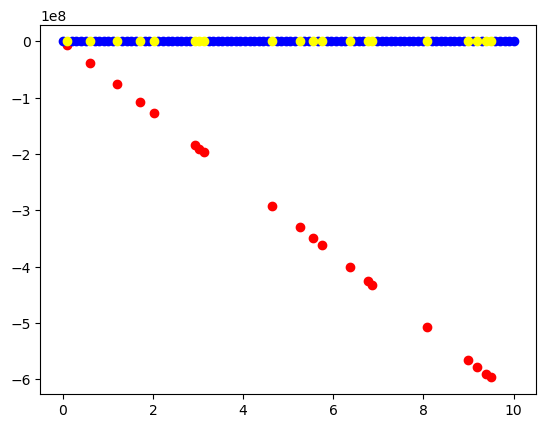

In [6]:
lst_pred = []
for t in testLoader:
    y_pred = model1.forward(t[:,0].unsqueeze(dim=1))

    plt.scatter(t[:,0].numpy(), y_pred.detach().numpy(),marker="o",color="red")

for t in trainLoader:

    plt.scatter(t[:,0].numpy(), t[:,1].numpy(),marker="o",color="blue")

for t in testLoader:
    y_pred = model2.forward(t[:,0].unsqueeze(dim=1))

    plt.scatter(t[:,0].numpy(), t[:,1].numpy(),marker="o",color="yellow")

In [7]:
for i in model1.parameters():
    print(i)

Parameter containing:
tensor([[-2.7202e-02],
        [ 1.8905e+03],
        [-6.5875e-04],
        [ 3.8426e+03],
        [-9.0447e-01],
        [-2.4195e-01],
        [ 5.8692e+03],
        [ 2.6960e+03],
        [ 1.2486e+03],
        [ 1.1116e+03]], requires_grad=True)
Parameter containing:
tensor([[-1.3188e-01, -1.8905e+03,  1.1694e-01, -3.8426e+03,  3.0802e-01,
          3.0432e-01, -5.8692e+03, -2.6960e+03, -1.2486e+03, -1.1116e+03]],
       requires_grad=True)
